In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x=pd.read_csv("weightedX.csv")
y=pd.read_csv("weightedY.csv")


In [3]:
x.head()

,1.2421
0,2.33480
1,0.13264
2,2.34700
3,6.73890
4,3.70890


In [4]:
x=x.values
y=y.values

In [5]:
x=(x-x.mean())/x.std()

In [6]:
plt.style.use("seaborn")

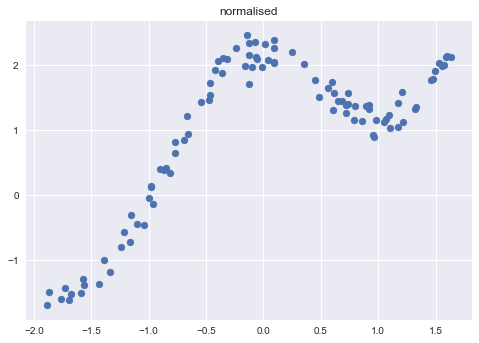

In [7]:
plt.scatter(x,y)
plt.title("normalised")
plt.show()

In [30]:
def weight(query,bw,x):
    k=(query-x)**2
    w=np.exp(-k/(2*bw*bw))
    return w

In [31]:
def weightmatrix(bw,query,x):
    m=x.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        w[i,i]=weight(query,bw,x[i])
    return w

    


In [32]:
def thetafind(x,bw,query,y):    
    w=weightmatrix(bw,query,x)
    ones=np.ones((x.shape[0],1))
    x=np.hstack((x,ones))
    first=(x.T*(w*x))
    second=x.T*(w*y)
    theta=np.linalg.pinv(first)*second
    return theta

In [33]:
def hypothesis(theta,query):
    return(theta[0][0]+theta[1][0]*query)

[matrix([[-2.24863745]]), matrix([[-1.83156329]]), matrix([[-1.39539908]]), matrix([[-0.96003151]]), matrix([[-0.54928339]]), matrix([[-0.18825643]]), matrix([[0.10141188]]), matrix([[0.30764899]]), matrix([[0.4331826]]), matrix([[0.49693487]]), matrix([[0.52991931]]), matrix([[0.56699796]]), matrix([[0.63814913]]), matrix([[0.76254913]]), matrix([[0.94653692]]), matrix([[1.18458187]]), matrix([[1.46184077]]), matrix([[1.75735396]]), matrix([[2.0474938]]), matrix([[2.30944232]])]


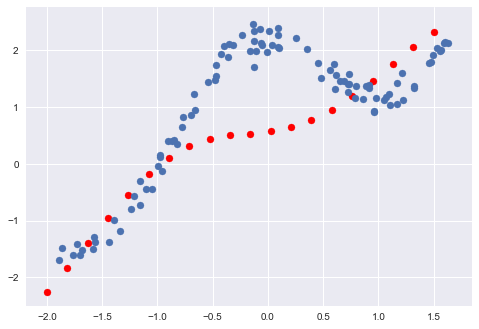

In [34]:
x_test=np.linspace(-2,1.5,20)
y_test=[]
for i in x_test:   
    theta=thetafind(x,0.8,i,y)
    y_test.append(hypothesis(theta,i))
print((y_test))
plt.scatter(x_test,y_test,color='r')
plt.scatter(np.asarray(x),np.asarray(y))
plt.show()